# Dane Przestrzenne w Pythonie - wektory

| Metadane              | Wartość                                                                                                            |
|-----------------------|--------------------------------------------------------------------------------------------------------------------|
| Kurs - adres YT       | [Dane Przestrzenne w Pythonie - wektory](https://www.youtube.com/watch?v=V86GqXVxJDA) |
| Część kursu           | 5 - Operacje Algebry Zbiorów                                                                                       |
| Ostatnia aktualizacja | 2025-02-16                                                                                                         |
| Autor                 | Szymon Moliński                                                                                                    |



## Algebra zbiorów

W tym przykładzie poznamy API do przeprowadzania przestrzennych operacji znanych z algebry zbiorów, na przykład znajdowanie części wspólnych i rozłącznych obszarów.

Operacje algebry zbiorów to:

- iloczyn (*intersection*)
- suma (*union*)
- różnica (*difference*)
- różnica symetryczna (*symmetric difference*)

Zobaczymy jak działają w odniesieniu do danych przestrzennych.

Na początek wczytamy dwa zbiory danych:
1. Granice dzielnic Nowego Jorku.
2. Granice szkolnych dystryktów Nowego Jorku.

In [1]:
import geopandas as gpd

In [2]:
SD_FNAME = 'nysd_20d/nysd.shp'
SD_FPATH = 'data/nysd_20d.zip'
SD_ZIP_PATH = 'zip://' + SD_FPATH + '!' + SD_FNAME

B_FNAME = 'nybbwi_20d/nybbwi.shp'
B_FPATH = 'data/nybbwi_20d.zip'
B_ZIP_PATH = 'zip://' + B_FPATH + '!' + B_FNAME

FS = (10, 10)

In [3]:
nyd = gpd.read_file(B_ZIP_PATH)
nys = gpd.read_file(SD_ZIP_PATH)

<Axes: >

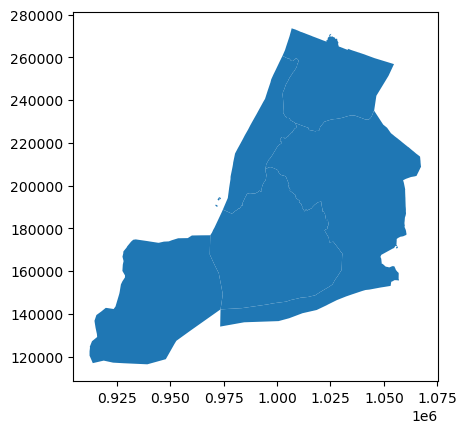

In [4]:
nyd.plot()

<Axes: >

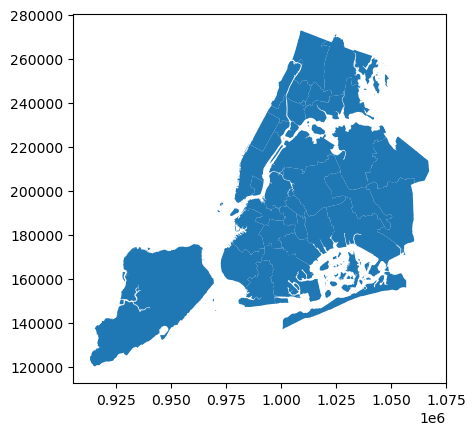

In [5]:
nys.plot()

In [6]:
# Sprawdzamy CRS (zawsze)

nyd.crs == nys.crs

True

In [7]:
# Zaglądamy do ramek

nyd.sample(3)

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
1,2,Bronx,188054.198841,1.598380e+09,"POLYGON ((1021632.336 267934.439, 1022108.577 ..."
3,4,Queens,429586.630985,3.858050e+09,"POLYGON ((1045438.075 235083.296, 1049675.845 ..."
2,3,Brooklyn,234928.658563,2.684411e+09,"POLYGON ((1004421.481 203543.225, 1004612.108 ..."


In [8]:
nys.sample(3)

,SchoolDist,Shape_Leng,Shape_Area,geometry
16,24,127337.190686,3.949768e+08,"MULTIPOLYGON (((1010183.566 208844.461, 101016..."
22,3,52072.050766,1.134889e+08,"POLYGON ((996235.504 225859.732, 996112.716 22..."
5,14,95607.545074,1.502956e+08,"POLYGON ((996887.819 208559.340, 996918.964 20..."


## Wydzielenie jednej dzielnicy

Do dalszej analizy wydzielimy obszar dzielnicy Brooklyn i zaczniemy obserwować jak działa algebra zbiorów na danych przestrzennych. Granice administracyjne dzielnicy nie pokrywają się z lądem, przebiegają przez ocean.

<Axes: >

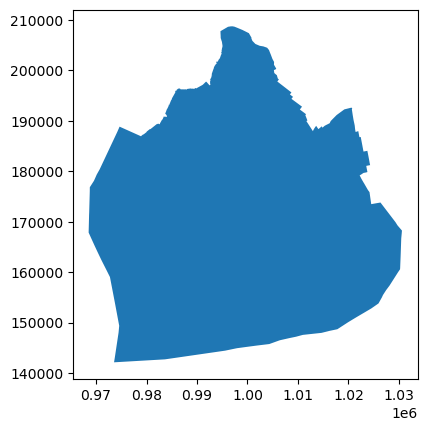

In [9]:
brooklyn = nyd[nyd['BoroName'] == "Brooklyn"]
brooklyn.plot()

## Operacje przestrzenne

- iloczyn (`intersection`) albo część wspólna dzielnicy Brooklyn i dystryktów szkolnych,
- suma (`union`) dzielnicy Brooklyn i dystryktów szkolnych,
- różnica symetryczna (`symmetric_difference`) między Brooklyn a dystryktami szkolnymi,
- różnica między dystryktami szkolnymi a Brooklynem.

In [10]:
# iloczyn

area_intersection = gpd.overlay(brooklyn, nys, how='intersection', keep_geom_type=False)

In [11]:
area_intersection.sample(2)

,BoroCode,BoroName,Shape_Leng_1,Shape_Area_1,SchoolDist,Shape_Leng_2,Shape_Area_2,geometry
5,3,Brooklyn,234928.658563,2.684411e+09,18,121184.034017,1.751489e+08,"MULTIPOLYGON (((1025159.139 156876.210, 102511..."
0,3,Brooklyn,234928.658563,2.684411e+09,13,86634.820950,1.048708e+08,"POLYGON ((983822.462 191677.056, 983897.776 19..."


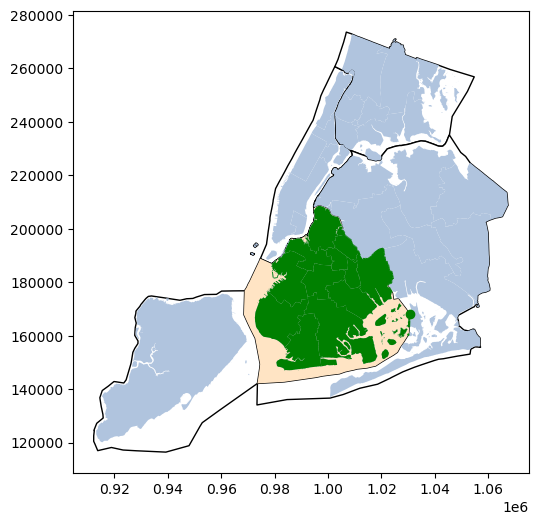

In [13]:
base = nyd.plot(color='white', edgecolor='black', figsize=(6, 6))
brooklyn.plot(ax=base, color='bisque')
nys.plot(ax=base, color='lightsteelblue')
area_intersection.plot(ax=base, color='green');

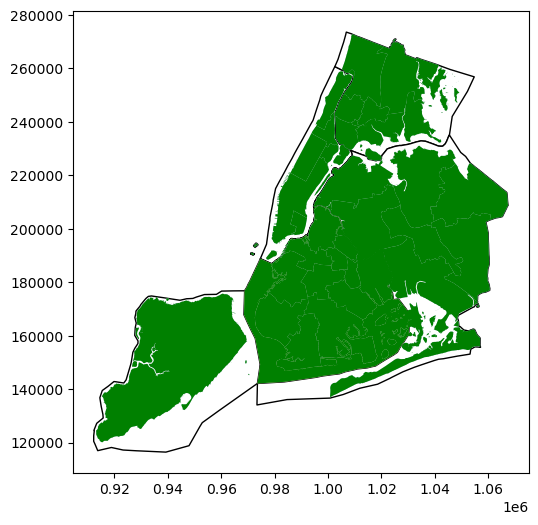

In [14]:
# suma

area_union = gpd.overlay(brooklyn, nys, how='union', keep_geom_type=False)
base = nyd.plot(color='white', edgecolor='black', figsize=(6, 6))
brooklyn.plot(ax=base, color='bisque')
nys.plot(ax=base, color='lightsteelblue')
area_union.plot(ax=base, color='green');

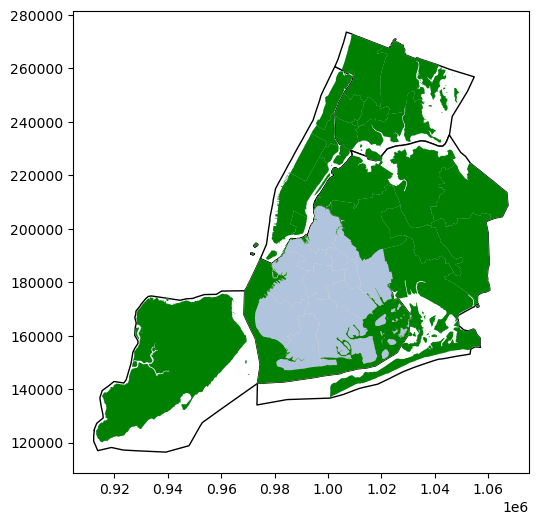

In [15]:
# symmetric difference

area_sym_diff = gpd.overlay(brooklyn, nys, how='symmetric_difference', keep_geom_type=False)
base = nyd.plot(color='white', edgecolor='black', figsize=(6, 6))
brooklyn.plot(ax=base, color='bisque')
nys.plot(ax=base, color='lightsteelblue')
area_sym_diff.plot(ax=base, color='green');

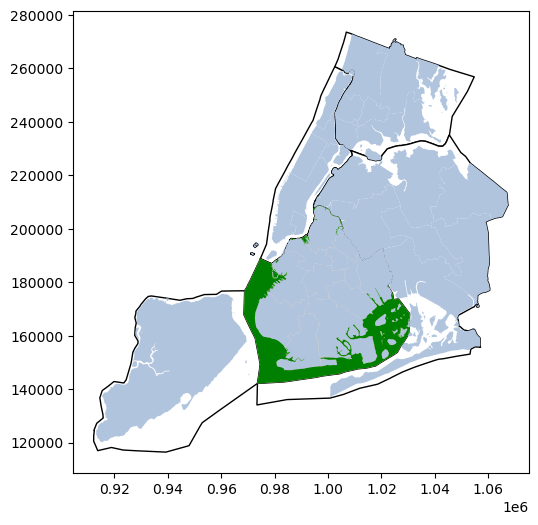

In [16]:
# difference

area_diff = gpd.overlay(brooklyn, nys, how='difference', keep_geom_type=False)
base = nyd.plot(color='white', edgecolor='black', figsize=(6, 6))
brooklyn.plot(ax=base, color='bisque')
nys.plot(ax=base, color='lightsteelblue')
area_diff.plot(ax=base, color='green');

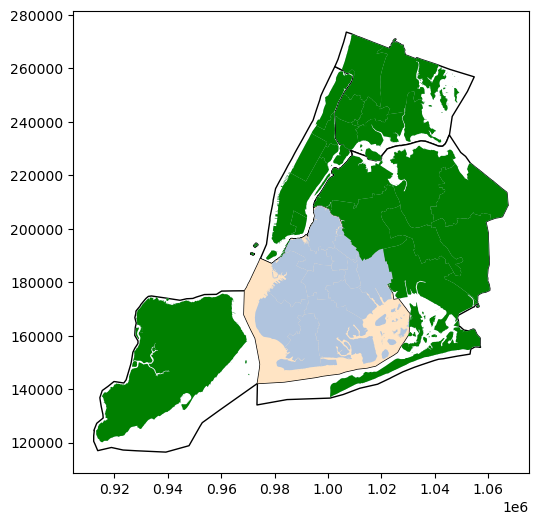

In [17]:
# difference 2

area_diff_2 = gpd.overlay(nys, brooklyn, how='difference', keep_geom_type=False)
base = nyd.plot(color='white', edgecolor='black', figsize=(6, 6))
brooklyn.plot(ax=base, color='bisque')
nys.plot(ax=base, color='lightsteelblue')
area_diff_2.plot(ax=base, color='green');

## Zadanie

Jak uzyskać `symmetric_difference` nie przeprowadzając tej operacji? Zastanów się, jakich innych operacji można użyć w tym celu i spróbuj napisać funkcję, która to zrobi.

---